In [1]:
import pandas as pd

In [2]:
pd.options.display.max_rows = 10

In [3]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::',
                     header=None, names=unames)

C:\Users\whatever\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [4]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::',
                        header=None, names=rnames)

In [5]:
mnames = ['movie_id', 'title', 'genres']
movies= pd.read_table('datasets/movielens/movies.dat', sep='::',
                      header=None, names=mnames)

In [6]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [10]:
data = pd.merge(pd.merge(ratings, users), movies)

In [11]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [12]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [13]:
mean_ratings = data.pivot_table('rating', index='title',
                                 columns='gender', aggfunc='mean')

In [14]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [15]:
ratings_by_title = data.groupby('title').size()

In [16]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [17]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [18]:
mean_ratings = mean_ratings.loc[active_titles]

In [19]:
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [20]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [21]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [22]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [23]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [24]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [25]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [26]:
rating_std_by_title = data.groupby('title')['rating'].std()

In [27]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Foreign Student (1994)                                             2.828427
Criminal Lovers (Les Amants Criminels) (1999)                      2.309401
Identification of a Woman (Identificazione di una donna) (1982)    2.121320
Tokyo Fist (1995)                                                  2.121320
Better Living (1998)                                               2.121320
Paralyzing Fear: The Story of Polio in America, A (1998)           2.121320
Eaten Alive (1976)                                                 2.121320
Living Dead Girl, The (La Morte Vivante) (1982)                    2.121320
Sunset Park (1996)                                                 2.121320
Talk of Angels (1998)                                              2.121320
Name: rating, dtype: float64

In [28]:
!head -n 10 datasets/babynames/yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


In [29]:
import pandas as pd

In [30]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt',
                        names=['name', 'sex', 'births'])

In [31]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [32]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [33]:
years = range(1880, 2011)

In [34]:
pieces = []

In [35]:
columns = ['name', 'sex', 'births']

In [36]:
for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [37]:
names = pd.concat(pieces, ignore_index=True)

In [38]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [39]:
total_births = names.pivot_table('births', index='year',
                                columns='sex', aggfunc=sum)

In [40]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [41]:
%matplotlib notebook

<IPython.core.display.Javascript object>


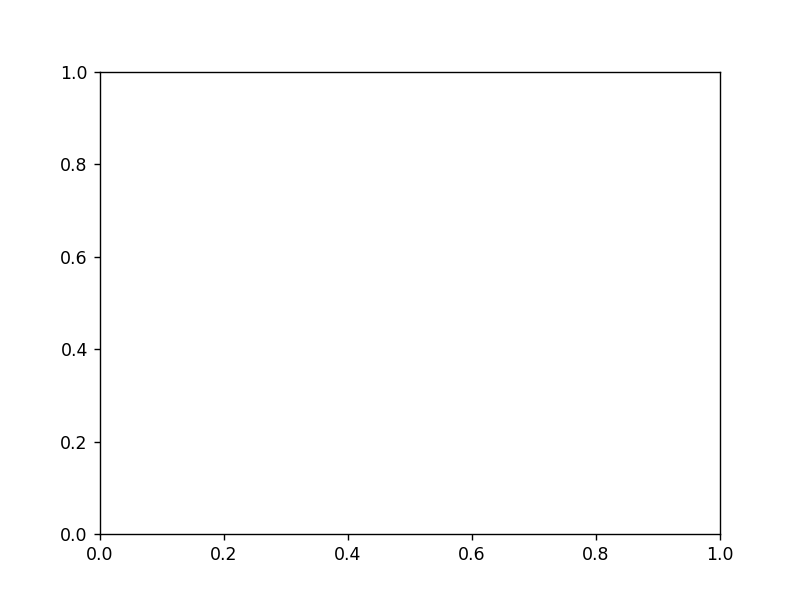

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

<IPython.core.display.Javascript object>


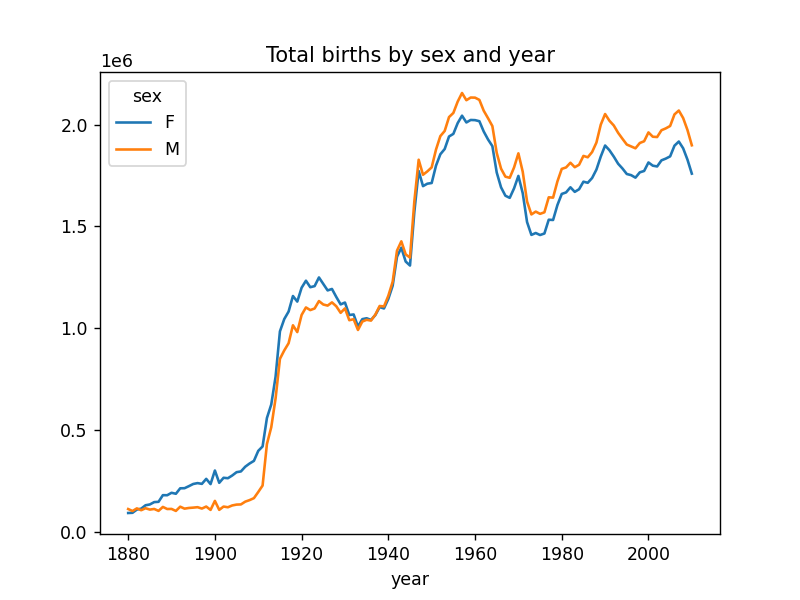

<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

In [43]:
total_births.plot(title='Total births by sex and year')

In [44]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

In [45]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [46]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [47]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [48]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)

In [49]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])

In [50]:
top1000 = pd.concat(pieces, ignore_index=True)

In [51]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [52]:
boys = top1000[top1000.sex == 'M']

In [53]:
girls = top1000[top1000.sex == 'F']

In [54]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

In [55]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [56]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

<IPython.core.display.Javascript object>


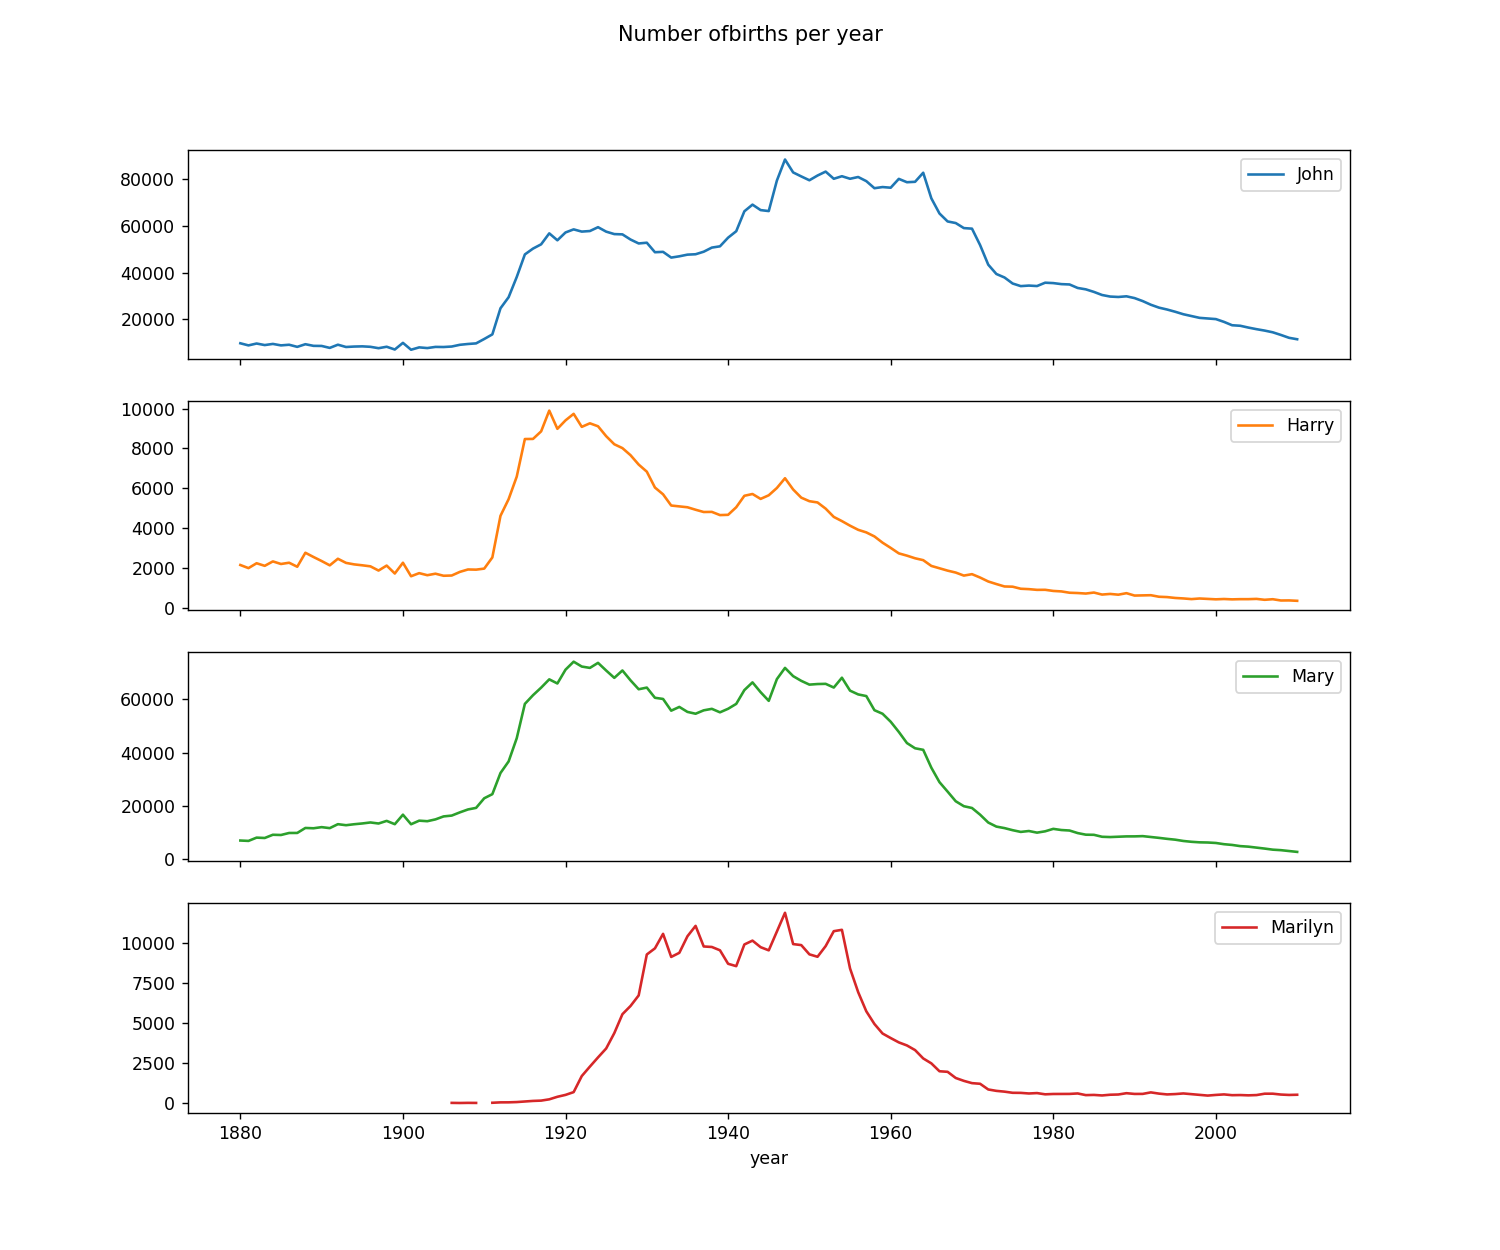

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

In [57]:
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title='Number ofbirths per year')

In [58]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)

<IPython.core.display.Javascript object>


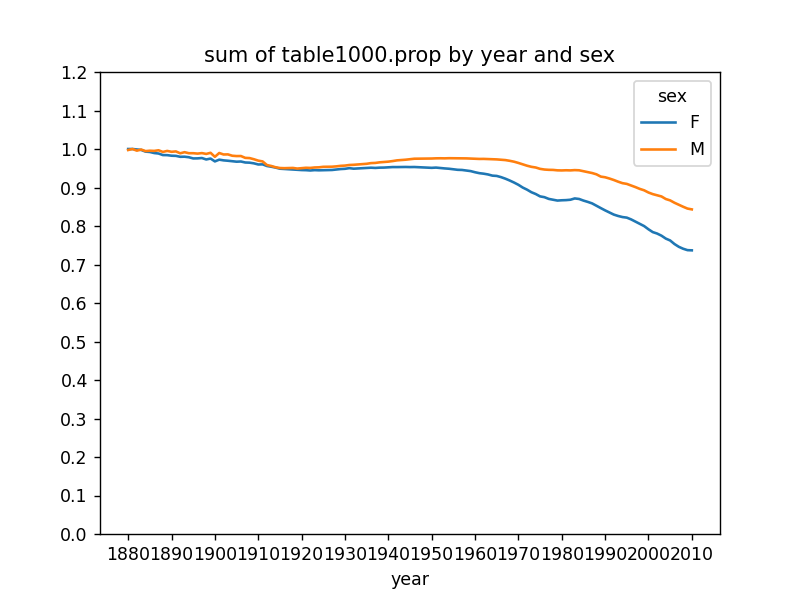

<AxesSubplot:title={'center':'sum of table1000.prop by year and sex'}, xlabel='year'>

In [59]:
import numpy as np
table.plot(title='sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [60]:
df = boys[boys.year == 2010]

In [61]:
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [62]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [63]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [64]:
prop_cumsum.values.searchsorted(0.5)

116

In [65]:
df = boys[boys.year == 1900]

In [66]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [67]:
in1900.values.searchsorted(0.5) + 1

25

In [68]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [69]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [70]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<IPython.core.display.Javascript object>


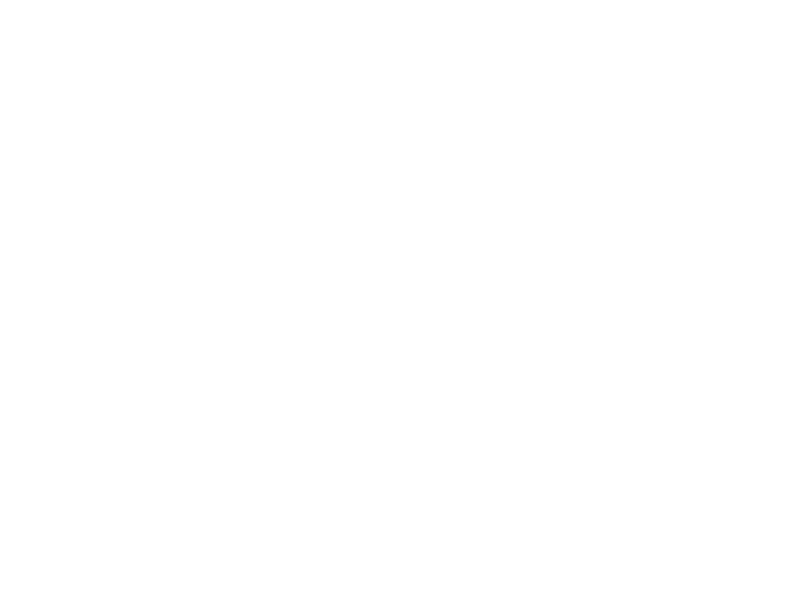

<IPython.core.display.Javascript object>


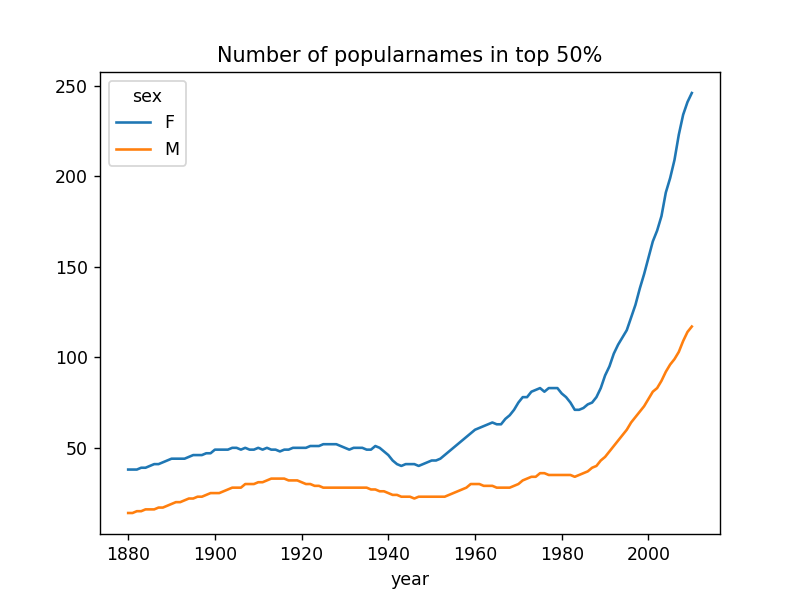

<AxesSubplot:title={'center':'Number of popularnames in top 50%'}, xlabel='year'>

In [71]:
fig = plt.figure()
diversity.plot(title='Number of popularnames in top 50%')

In [72]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [73]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [74]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [75]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [76]:
letter_prop = subtable / subtable.sum()

In [77]:
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

<IPython.core.display.Javascript object>


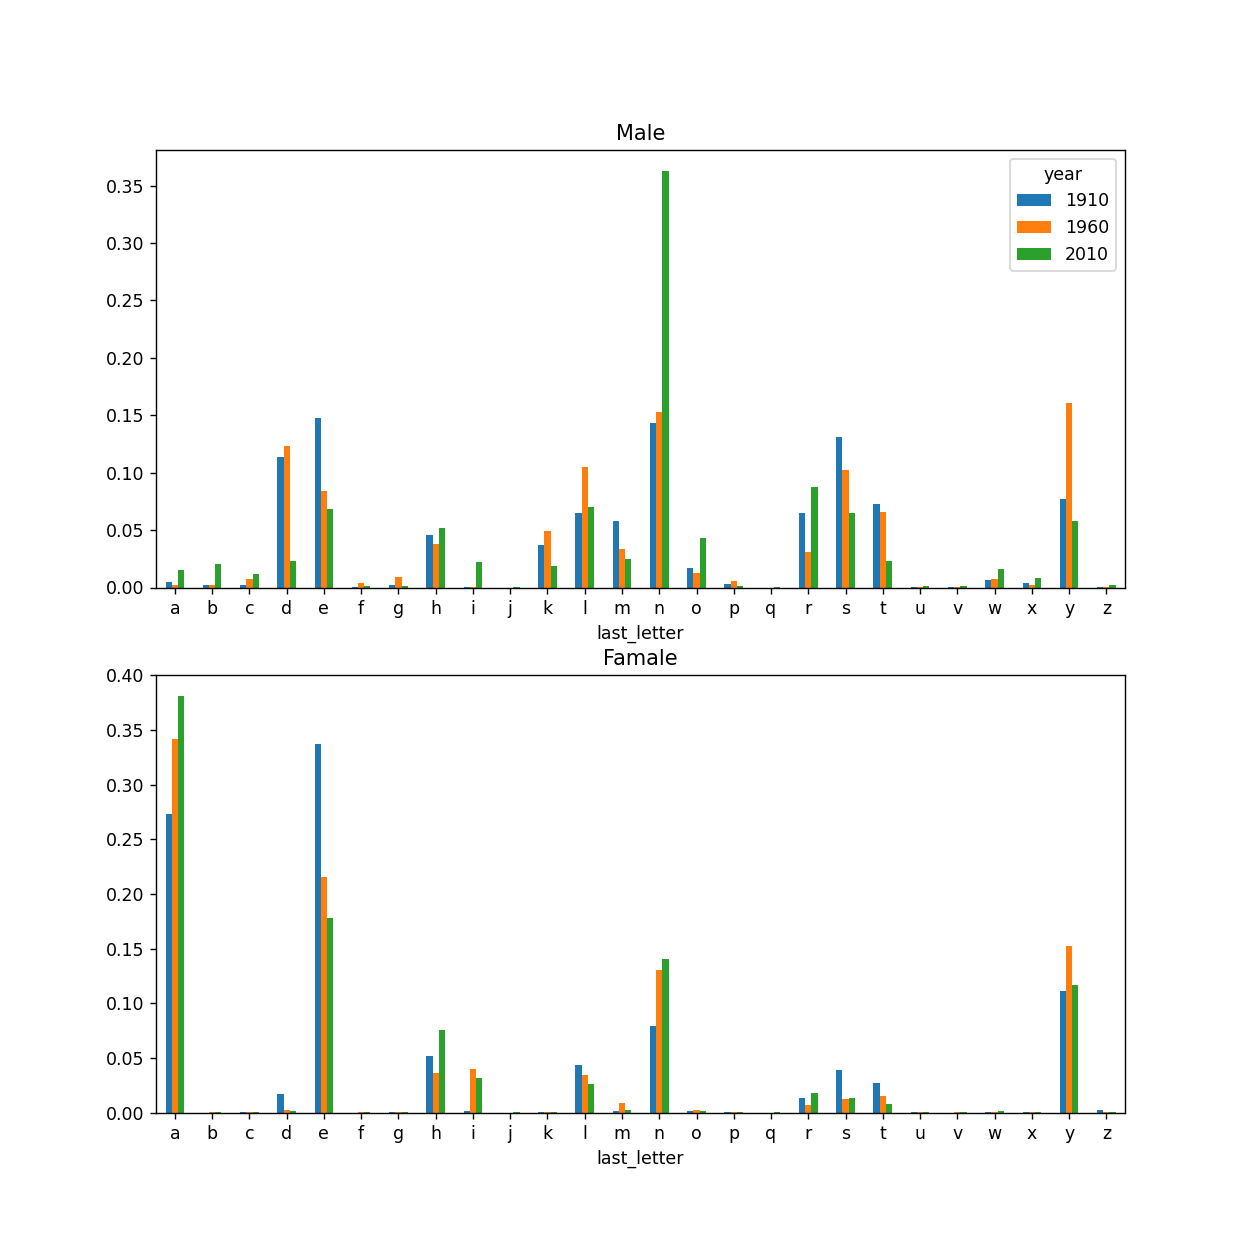

<AxesSubplot:title={'center':'Famale'}, xlabel='last_letter'>

In [78]:
fig, axes = plt.subplots(2 ,1, figsize=(10, 10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Famale',
                     legend=False)

In [79]:
letter_prop = table / table.sum()

In [80]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [81]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


<IPython.core.display.Javascript object>


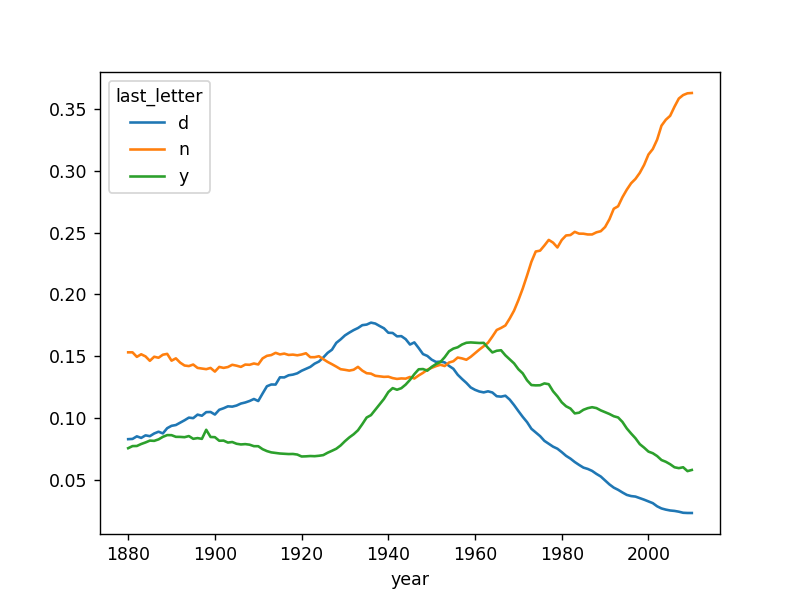

<AxesSubplot:xlabel='year'>

In [82]:
dny_ts.plot()

In [83]:
all_names = pd.Series(top1000.name.unique())

In [84]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [85]:
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [86]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [87]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [88]:
table = filtered.pivot_table('births', index='year', 
                             columns='sex', aggfunc='sum')

In [89]:
table = table.div(table.sum(1), axis=0)

In [90]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


<IPython.core.display.Javascript object>


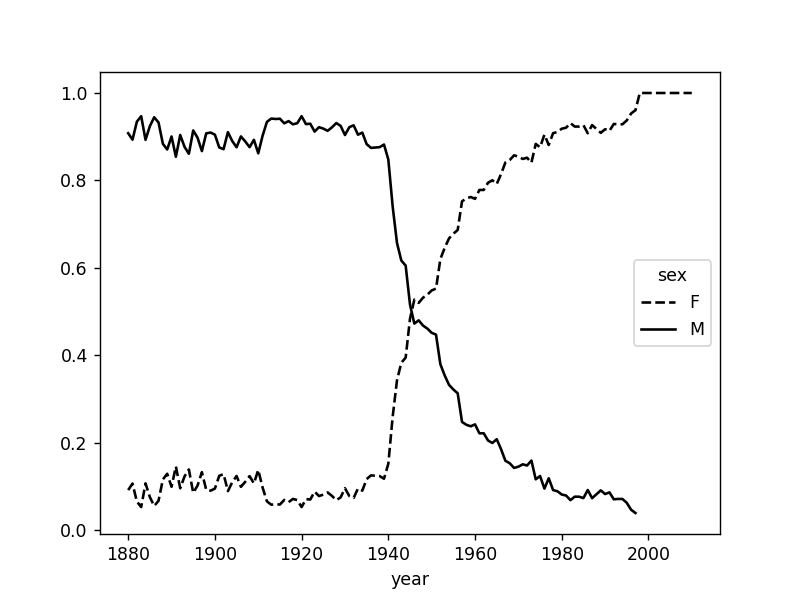

<AxesSubplot:xlabel='year'>

In [91]:
table.plot(style={'M': 'k-', 'F': 'k--'})

In [92]:
import json

In [93]:
db = json.load(open('datasets/usda_food/database.json'))

In [94]:
len(db)

6636

In [95]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [96]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [97]:
nutrients =pd.DataFrame(db[0]['nutrients'])

In [98]:
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [99]:
info_keys = ['description', 'group', 'id', 'manufacturer']

In [100]:
info = pd.DataFrame(db, columns=info_keys)

In [101]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [102]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [103]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [117]:
nutrients=[]

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
    
nutrients = pd.concat(nutrients, ignore_index=True)

In [118]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [119]:
nutrients.duplicated().sum()

14179

In [120]:
nutrients = nutrients.drop_duplicates()

In [121]:
col_mapping = {'description': 'food',
               'group': 'fgroup'}

In [122]:
info = info.rename(columns=col_mapping, copy=False)

In [123]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [124]:
col_mapping = {'description': 'nutrient',
               'group': 'nutgroup' }

In [125]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [126]:
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [127]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [128]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [129]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [130]:
result= ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

In [131]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

In [132]:
get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimun = lambda x: x.loc[x.value.idxmin()]

In [136]:
max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

In [137]:
max_foods.food= max_foods.food.str[:50]

In [138]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                          Gelatins, dry powder, unsweetened
Arginine                              Seeds, sesame flour, low-fat
Aspartic acid                                  Soy protein isolate
Cystine               Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                  Soy protein isolate
                                       ...                        
Serine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Threonine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Tryptophan        Sea lion, Steller, meat with fat (Alaska Native)
Tyrosine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Valine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Name: food, Length: 19, dtype: object

federal election commission database

In [140]:
fec =pd.read_csv('datasets/fec/P00000001-ALL.csv', low_memory=False)

In [141]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [142]:
fec.iloc[123456]

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object

In [143]:
unique_cands = fec.cand_nm.unique()

In [144]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [146]:
unique_cands[3]

"Roemer, Charles E. 'Buddy' III"

In [148]:
parties = {'Bachmann, Michelle': 'Rep', 
            'Romney, Mitt': 'Rep', 
            'Obama, Barack': 'Dem',
            "Roemer, Charles E. 'Buddy' III": 'Rep', 
            'Pawlenty, Timothy': 'Rep',
            'Johnson, Gary Earl': 'Rep', 
            'Paul, Ron': 'Rep', 
            'Santorum, Rick': 'Rep',
            'Cain, Herman': 'Rep', 
            'Gingrich, Newt': 'Rep', 
            'McCotter, Thaddeus G': 'Rep',
            'Huntsman, Jon': 'Rep', 
            'Perry, Rick': 'Rep'}

In [149]:
fec.cand_nm[12345:12365]

12345    Romney, Mitt
12346    Romney, Mitt
12347    Romney, Mitt
12348    Romney, Mitt
12349    Romney, Mitt
             ...     
12360    Romney, Mitt
12361    Romney, Mitt
12362    Romney, Mitt
12363    Romney, Mitt
12364    Romney, Mitt
Name: cand_nm, Length: 20, dtype: object

In [150]:
fec.cand_nm[12345: 12355]

12345    Romney, Mitt
12346    Romney, Mitt
12347    Romney, Mitt
12348    Romney, Mitt
12349    Romney, Mitt
12350    Romney, Mitt
12351    Romney, Mitt
12352    Romney, Mitt
12353    Romney, Mitt
12354    Romney, Mitt
Name: cand_nm, dtype: object

In [155]:
fec['party'] = fec.cand_nm.map(parties)

In [156]:
fec['party'].value_counts()

Dem    593746
Rep    407985
Name: party, dtype: int64

In [157]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [158]:
fec = fec[fec.contb_receipt_amt > 0]

In [151]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   234829
INFORMATION REQUESTED                      35176
ATTORNEY                                   34409
HOMEMAKER                                  30199
PHYSICIAN                                  23530
INFORMATION REQUESTED PER BEST EFFORTS     21364
ENGINEER                                   14372
TEACHER                                    13998
CONSULTANT                                 13335
PROFESSOR                                  12565
Name: contbr_occupation, dtype: int64

In [159]:
fec_mrbo = fec[fec.cand_nm.isin(['Romney, Mitt', 'Paul, Ron'])]

In [163]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)': 'NOT PROVIDED',
    'C.E.O': 'CEO'
}



In [167]:
# if no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [168]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'SELF': 'SELF-EMPLOYED',
    'SELF EMPLOYED': 'SELF-EMPLOYED'
}

# if no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [169]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')

In [170]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

In [171]:
over_2mm

party,Dem,Rep
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
C.E.O.,1690.00,2592983.11
CEO,2074284.79,1640758.41
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
...,...,...
PRESIDENT,1878509.95,4720923.76
PROFESSOR,2165071.08,296702.73
REAL ESTATE,528902.09,1625902.25


<IPython.core.display.Javascript object>


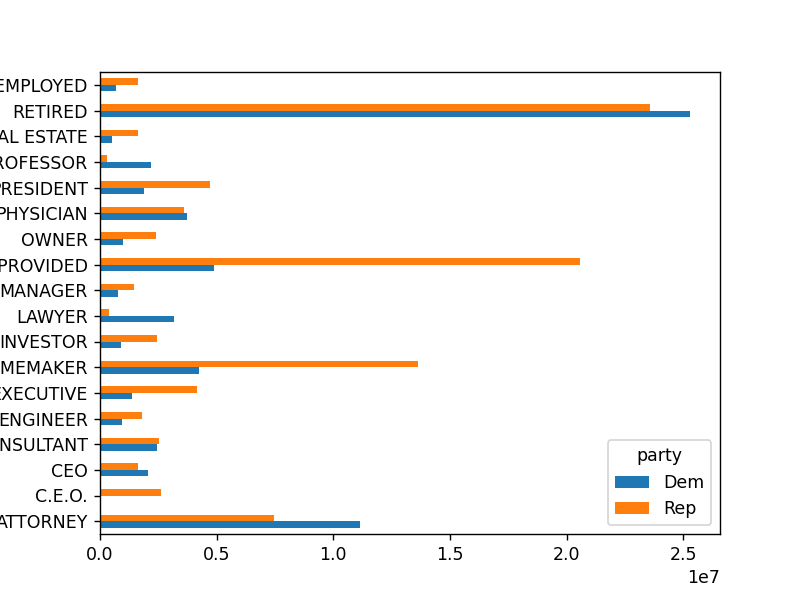

<AxesSubplot:ylabel='contbr_occupation'>

In [173]:
over_2mm.plot(kind='barh')

In [174]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [181]:
grouped= fec_mrbo.groupby('cand_nm')

In [182]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm       contbr_occupation
Paul, Ron     RETIRED              2526350.60
              ENGINEER              871465.72
              PHYSICIAN             684659.16
              REQUESTED             568532.46
              HOMEMAKER             467082.48
                                      ...    
Romney, Mitt  HOMEMAKER            8147446.22
              ATTORNEY             5364718.82
              PRESIDENT            2491244.89
              EXECUTIVE            2300947.03
              C.E.O.               1968386.11
Name: contb_receipt_amt, Length: 14, dtype: float64

In [183]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm       contbr_employer   
Paul, Ron     SELF-EMPLOYED         4224937.95
              NONE                  2571557.63
              REQUESTED              894009.54
              UNEMPLOYED             194743.62
              US ARMY                130870.02
                                       ...    
Romney, Mitt  CREDIT SUISSE          281150.00
              MORGAN STANLEY         267266.00
              GOLDMAN SACH & CO.     238250.00
              BARCLAYS CAPITAL       162750.00
              H.I.G. CAPITAL         139500.00
Name: contb_receipt_amt, Length: 20, dtype: float64

In [184]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 
                    100000, 1000000, 10000000])

In [185]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [186]:
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
856847    (100, 1000]
856848      (10, 100]
856849      (10, 100]
856850    (100, 1000]
856851    (100, 1000]
Name: contb_receipt_amt, Length: 248316, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [187]:
 grouped = fec_mrbo.groupby(['cand_nm', labels])

In [188]:
grouped.size().unstack(0)

cand_nm,"Paul, Ron","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",23,77
"(1, 10]",2390,3681
"(10, 100]",99957,31853
"(100, 1000]",39333,43357
"(1000, 10000]",1456,26186
"(10000, 100000]",2,1
"(100000, 1000000]",0,0
"(1000000, 10000000]",0,0


In [189]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [190]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)

In [191]:
normed_sums

cand_nm,"Paul, Ron","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.230000,0.770000
"(1, 10]",0.403538,0.596462
"(10, 100]",0.749208,0.250792
"(100, 1000]",0.346826,0.653174
"(1000, 10000]",0.046617,0.953383
"(10000, 100000]",0.797448,0.202552
"(100000, 1000000]",NaN,NaN
"(1000000, 10000000]",NaN,NaN


<IPython.core.display.Javascript object>


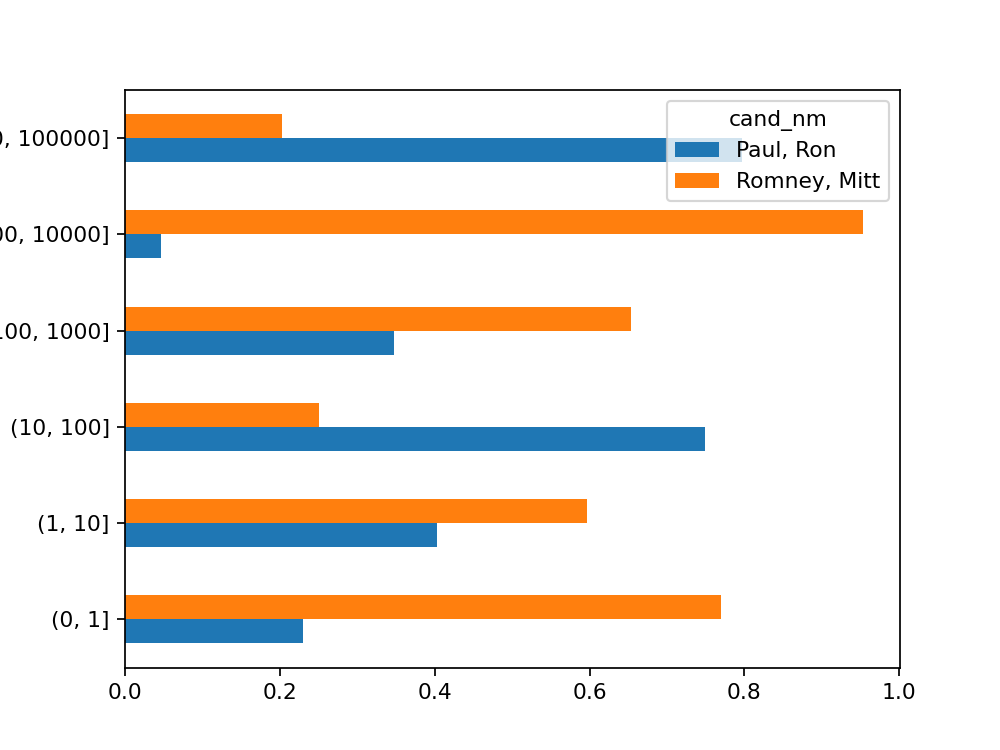

<AxesSubplot:ylabel='contb_receipt_amt'>

In [192]:
normed_sums[:-2].plot(kind='barh')

In [193]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [195]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [197]:
totals[:10]

cand_nm,"Paul, Ron","Romney, Mitt"
contbr_st,,
AA,851.20,135.00
AE,54254.83,5680.00
AK,128874.09,86204.24
AL,220539.24,527303.51
AP,33784.98,1655.00
AR,116612.21,105556.00
AZ,546020.56,1888436.23
CA,2826012.18,11237636.60
CO,469009.77,1506714.12


In [198]:
percent = totals.div(totals.sum(1), axis=0)

In [199]:
percent[:10]

cand_nm,"Paul, Ron","Romney, Mitt"
contbr_st,,
AA,0.863111,0.136889
AE,0.905230,0.094770
AK,0.599196,0.400804
AL,0.294901,0.705099
AP,0.953301,0.046699
AR,0.524883,0.475117
AZ,0.224288,0.775712
CA,0.200944,0.799056
CO,0.237386,0.762614
